In [4]:
pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [6]:
# Load the dataset
import pandas as pd
data = pd.read_csv('HW1_Data.csv')

In [7]:
# Prepare the dataset
X = data.drop('churndep', axis=1)  # Features
y = data['churndep']  # Target variable

In [8]:
# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Initialize the decision tree classifier with entropy as the criterion and the default max depth
tree_clf = DecisionTreeClassifier(criterion='entropy')

In [10]:
# Fit the model to the training data
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [11]:
# Make predictions on the test data
y_pred = tree_clf.predict(X_test)

In [12]:
# Evaluate the model using a confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [13]:
# Output the results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2618 2140]
 [2298 2512]]

Accuracy: 0.5361622073578596

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.55      0.54      4758
           1       0.54      0.52      0.53      4810

    accuracy                           0.54      9568
   macro avg       0.54      0.54      0.54      9568
weighted avg       0.54      0.54      0.54      9568



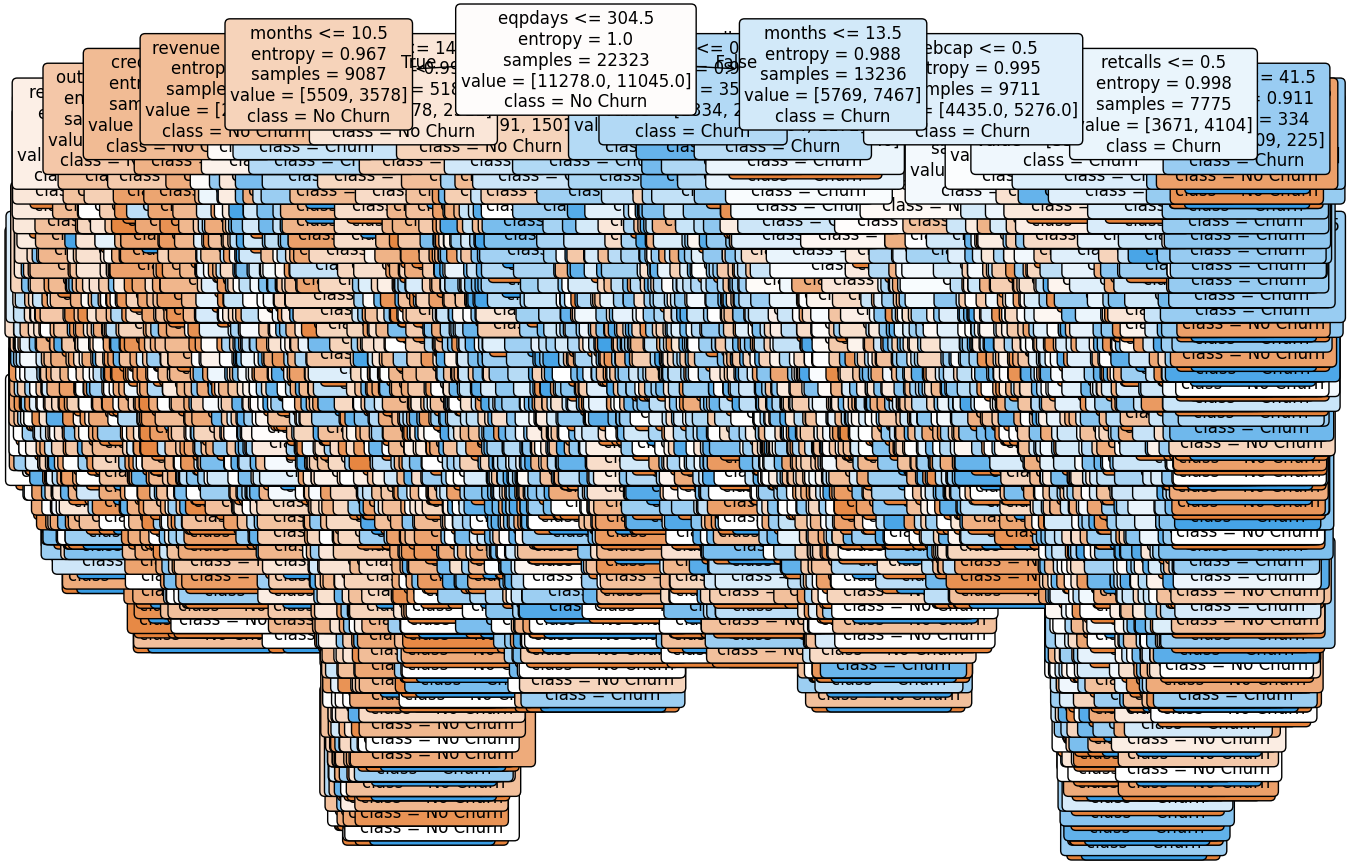

In [14]:
###### Visualization of the Decision Tree 

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_clf, 
          feature_names=X.columns,  
          class_names=['No Churn', 'Churn'],  
          filled=True, 
          rounded=True, 
          fontsize=12)

plt.title("Decision Tree Visualization")
plt.show()

Confusion matrix, without normalization
[[2618 2140]
 [2298 2512]]
Normalized confusion matrix
[[0.55023119 0.44976881]
 [0.47775468 0.52224532]]


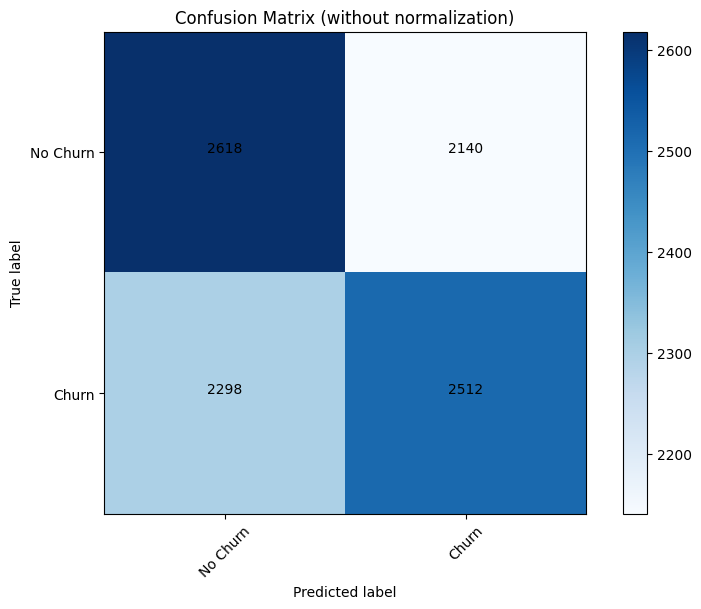

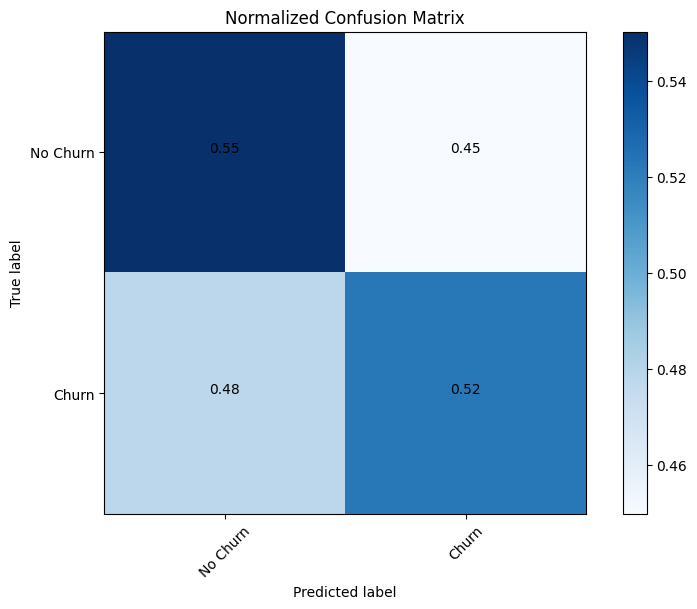

In [18]:
####### Confusion Matrix Visualization 

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_matrix, classes=['No Churn', 'Churn'], title='Confusion Matrix (without normalization)')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_matrix, classes=['No Churn', 'Churn'], normalize=True, title='Normalized Confusion Matrix')

plt.show()

In [15]:
# Explore different tree depths and splitting criteria
for depth in [None, 5, 10]:
    for min_samples_split in [50, 150, 300]:
        tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, min_samples_split=min_samples_split)
        tree_clf.fit(X_train, y_train)
        y_pred = tree_clf.predict(X_test)
        print(f"Max Depth: {depth}, Min Samples Split: {min_samples_split}")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("\nClassification Report:\n", classification_report(y_test, y_pred))
        print("\n")

Max Depth: None, Min Samples Split: 50
Accuracy: 0.5481814381270903
Confusion Matrix:
 [[2767 1991]
 [2332 2478]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.58      0.56      4758
           1       0.55      0.52      0.53      4810

    accuracy                           0.55      9568
   macro avg       0.55      0.55      0.55      9568
weighted avg       0.55      0.55      0.55      9568



Max Depth: None, Min Samples Split: 150
Accuracy: 0.5799540133779264
Confusion Matrix:
 [[2796 1962]
 [2057 2753]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.59      0.58      4758
           1       0.58      0.57      0.58      4810

    accuracy                           0.58      9568
   macro avg       0.58      0.58      0.58      9568
weighted avg       0.58      0.58      0.58      9568



Max Depth: None, Min Samples Split: 300
Accuracy: 0.58810618729

Confusion Matrix for the Best Model:
 [[2134 2624]
 [1182 3628]]

Accuracy for the Best Model: 0.6022157190635451

Classification Report for the Best Model:
               precision    recall  f1-score   support

           0       0.64      0.45      0.53      4758
           1       0.58      0.75      0.66      4810

    accuracy                           0.60      9568
   macro avg       0.61      0.60      0.59      9568
weighted avg       0.61      0.60      0.59      9568



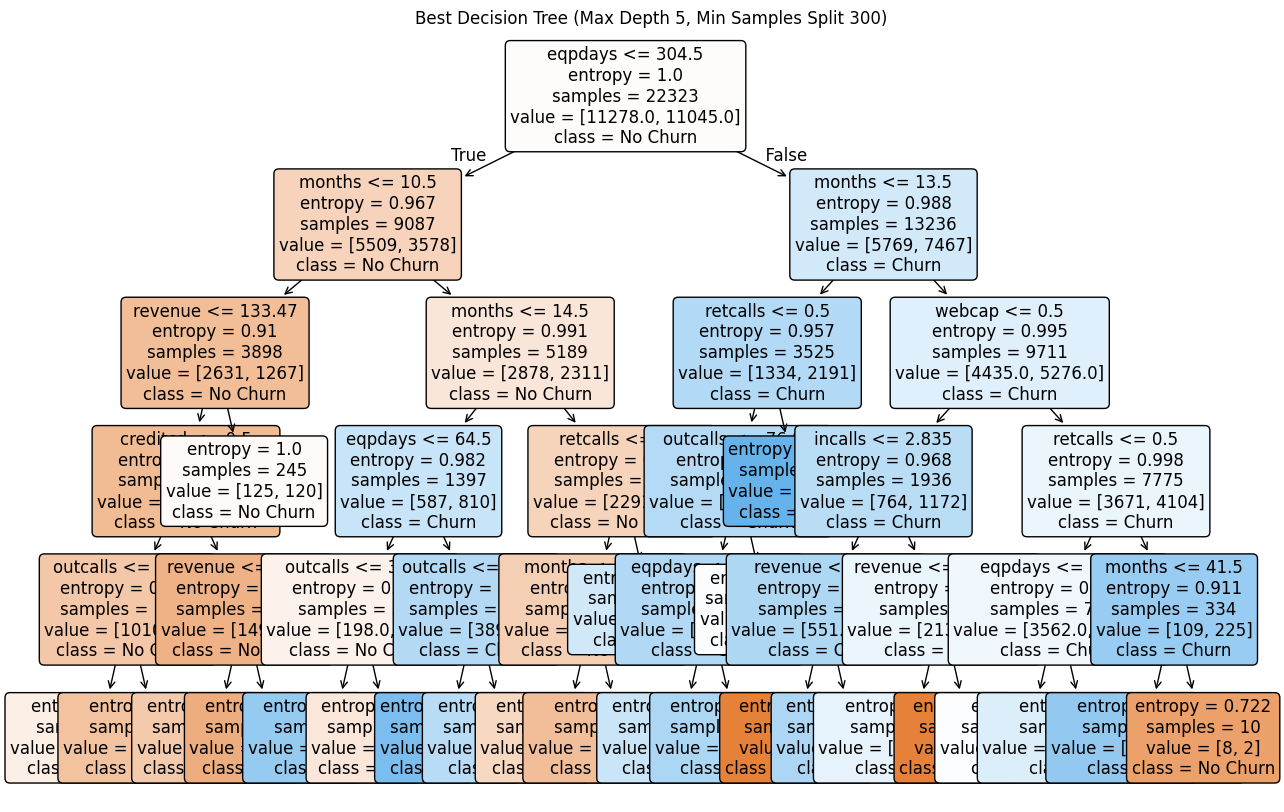

Confusion matrix, without normalization
[[2134 2624]
 [1182 3628]]
Normalized confusion matrix
[[0.44850778 0.55149222]
 [0.24573805 0.75426195]]


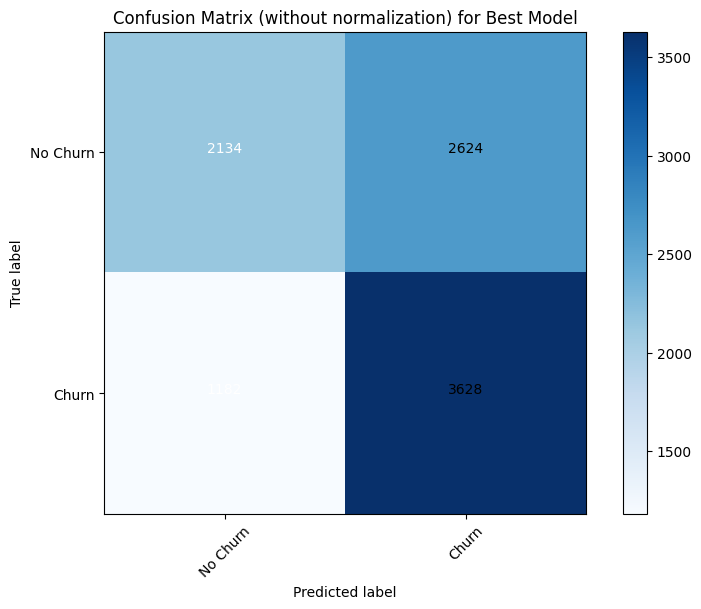

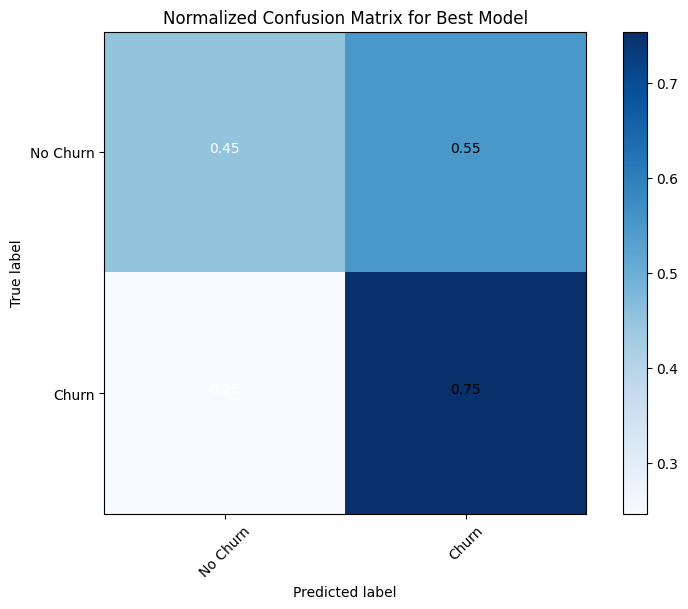

In [19]:
### Computation and Visualization of the Best Perfoming Tree Based on the Evaluation Above

best_tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=300)

best_tree_clf.fit(X_train, y_train)

best_y_pred = best_tree_clf.predict(X_test)

best_conf_matrix = confusion_matrix(y_test, best_y_pred)
best_accuracy = accuracy_score(y_test, best_y_pred)

# Output the results for the best model
print("Confusion Matrix for the Best Model:\n", best_conf_matrix)
print("\nAccuracy for the Best Model:", best_accuracy)
print("\nClassification Report for the Best Model:\n", classification_report(y_test, best_y_pred))

### Visualization of the Best Decision Tree 

# Plot the best decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_tree_clf, 
          feature_names=X.columns,  # Use actual feature names from the dataset
          class_names=['No Churn', 'Churn'],  # Update with your target class names
          filled=True, 
          rounded=True, 
          fontsize=12)

plt.title("Best Decision Tree (Max Depth 5, Min Samples Split 300)")
plt.show()

### Confusion Matrix Visualization for the Best Model 

# Plot non-normalized confusion matrix for the best model
plt.figure(figsize=(8, 6))
plot_confusion_matrix(best_conf_matrix, classes=['No Churn', 'Churn'], title='Confusion Matrix (without normalization) for Best Model')

# Plot normalized confusion matrix for the best model
plt.figure(figsize=(8, 6))
plot_confusion_matrix(best_conf_matrix, classes=['No Churn', 'Churn'], normalize=True, title='Normalized Confusion Matrix for Best Model')

plt.show()

